In [1]:
import math as m
import numpy as np 
import matplotlib.pyplot as plt
r2=float(input("Enter r2: "))
r3=float(input("Enter r3: "))
r4=float(input("Enter r4: "))
t1=float(input("Enter theta1: "))
case=int(input("Choose an option:\n1) Enter theta2\n2) Enter theta3\n3) Enter r1\n "))


Enter r2: 5
Enter r3: 8
Enter r4: 0
Enter theta1: 0
Choose an option:
1) Enter theta2
2) Enter theta3
3) Enter r1
 2


In [2]:
def position():
    global t2; global t3; global t4;  global r1;
    t4=t1+(m.pi)/2;
    if (case==1):
            th2=float(input("Enter t2 (in degrees): "))
            t2=m.radians(th2)
            A=2*(r4*m.cos(t1)*m.cos(t4)-r2*m.cos(t1)*m.cos(t2)+r4*m.sin(t1)*m.sin(t4)-r2*m.sin(t1)*m.sin(t2))
            B=(r4**2)+(r2**2)-(r3**2)-2*r2*r4*m.cos(t2)*m.cos(t4)-2*r2*r4*m.sin(t2)*m.sin(t4)
            r1p=(-A+m.sqrt(A**2-4*B))/2
            r1n=(-A-m.sqrt(A**2-4*B))/2
            if(r1p<0):
                r1=r1n
            else:
                r1=r1p
            t3=m.atan((r1*m.sin(t1)+r4*m.sin(t4)-r2*m.sin(t2))/(r1*m.cos(t1)+r4*m.cos(t4)-r2*m.cos(t2)))
            print('Angle of coupler in degrees(theta 3):', m.degrees(t3))
            print('r1: ', r1)
    elif (case==2):
            th3=float(input("Enter t3 (in degrees): "))
            t3=m.radians(th3)
            A=2*(r4*m.cos(t1)*m.cos(t4)-r3*m.cos(t1)*m.cos(t3)+r4*m.sin(t1)*m.sin(t4)-r3*m.sin(t1)*m.sin(t3))
            B=(r4**2)+(r3**2)-(r2**2)-2*r3*r4*m.cos(t3)*m.cos(t4)-2*r3*r4*m.sin(t3)*m.sin(t4)
            r1p=(-A+m.sqrt(A**2-4*B))/2
            r1n=(-A-m.sqrt(A**2-4*B))/2
            if(r1p<0):
                r1=r1n
            else:
                r1=r1p
            t2=m.atan((r1*m.sin(t1)+r4*m.sin(t4)-r3*m.sin(t3))/(r1*m.cos(t1)+r4*m.cos(t4)-r3*m.cos(t3)))
            print('Angle of crank in degrees(theta 2):', m.degrees(t2))
            print('r1: ', r1)
    elif (case==3):
            r1=float(input("Enter r1: "))
            A=-2*r1*r3*m.cos(t1)-2*r3*r4*m.cos(t4)
            B=-2*r1*r2*m.sin(t1)-2*r3*r4*m.sin(t4)
            C=r1**2+r4**2+r3**2-r2**2+2*r1*r4*(m.cos(t1)*m.cos(t4)+m.sin(t1)*m.sin(t4))
            t3p=2*m.atan((-B+m.sqrt(A**2+B**2-C**2))/(C-A))
            t3n=2*m.atan((-B-m.sqrt(A**2+B**2-C**2))/(C-A))
            t2a=m.atan((r1*m.sin(t1)+r4*m.sin(t4)-r3*m.sin(t3p))/(r1*m.cos(t1)+r4*m.cos(t4)-r3*m.cos(t3p)))
            t2b=m.atan((r1*m.sin(t1)+r4*m.sin(t4)-r3*m.sin(t3n))/(r1*m.cos(t1)+r4*m.cos(t4)-r3*m.cos(t3n)))
            t2temp=[m.degrees(t2a), m.degrees(t2b)]
            t3temp=[m.degrees(t3p), m.degrees(t3n)]
            t2 = m.radians(t2temp[1]); t3 = m.radians(t3temp[1]);
            print('Possible angle of crank values in degrees(theta 2): ',t2temp)
            print('Possible angle of coupler values in degrees(theta 3): ', t3temp)

In [3]:
def velocity():
    global dt2; global dt3; global dr1; 
    if(case == 1):
        dt2=float(input("Enter t2 dot (in rad/s): "))
        A = np.array([[m.cos(t1), r3*(m.sin(t3))],[m.sin(t1), -r3*(m.cos(t3))]]);
        B = np.array([[-r2*dt2*(m.sin(t2))],[r2*dt2*(m.cos(t2))]]);
        C = (np.linalg.inv(A)).dot(B)
        dr1 = float(C[0]);
        dt3 = float(C[1]);
        print("Velocity of r1 is: ", dr1); print("Angular velocity of coupler is: ", dt3);
    elif(case == 2):
        dt3=float(input("Enter t3 dot (in rad/s): "))
        A = np.array([[m.cos(t1), r2*(m.sin(t2))],[m.sin(t1), -r2*(m.cos(t2))]]);
        B = np.array([[-r3*dt3*(m.sin(t3))],[r3*dt3*(m.cos(t3))]]);
        C = (np.linalg.inv(A)).dot(B)
        dr1 = float(C[0]);
        dt2 = float(C[1]);
        print("Velocity of r1 is: ", dr1); print("Angular velocity of crank is: ", dt2);
    elif(case == 3):
        dr1=float(input("Enter r1 dot (in m/s): "))
        A = np.array([[-r2*(m.sin(t2)), -r3*(m.sin(t3))],[r2*(m.cos(t2)), r3*(m.cos(t3))]]);
        B = np.array([[dr1*(m.cos(t1))],[dr1*(m.sin(t1))]]);
        C = (np.linalg.inv(A)).dot(B)
        dt2 = float(C[0]);
        dt3 = float(C[1]);
        print("Angular velocity of crank is:  ", dt2); print("Angular velocity of coupler is: ", dt3);
        


In [4]:
pos = position() 
pos

Enter t3 (in degrees): -26.2278
Angle of crank in degrees(theta 2): 44.99992398872429
r1:  10.71189095433543


In [5]:
vel = velocity()
vel

Enter t3 dot (in rad/s): -4.928
Velocity of r1 is:  -52.788058560536996
Angular velocity of crank is:  10.002737477362981


In [6]:
def acceleration():
    global ddt2; global ddt3; global ddr1;
    if(case==1):
        ddt2=float(input("Enter acceleration of link 2 (in rad/s^2): "))
        A=np.array([[m.cos(t1), r3*(m.sin(t3))],[m.sin(t1), -r3*(m.cos(t3))]]);
        B=np.array([[-r2*ddt2*m.sin(t2)-r2*(dt2**2)*m.cos(t2)-r3*(dt3**2)*m.cos(t3)],[r2*ddt2*m.cos(t2)-r2*(dt2**2)*m.sin(t2)-r3*(dt3**2)*m.sin(t3)]]);
        C=(np.linalg.inv(A)).dot(B)
        ddr1 = float(C[0]);
        ddt3 = float(C[1]);
        print("Acceleration of r1 is: ",ddr1);
        print("Angular acceleration of coupler is: ",ddt3);
    elif(case==2):
        ddt3=float(input("Enter acceleration of link 3 (in rad/s^2): "))
        A=np.array([[m.cos(t1), r2*(m.sin(t2))],[m.sin(t1), -r2*(m.cos(t2))]]);
        B=np.array([[-r3*ddt3*m.sin(t3)-r3*(dt3**2)*m.cos(t3)-r2*(dt2**2)*m.cos(t2)],[r3*ddt3*m.cos(t3)-r3*(dt3**2)*m.sin(t3)-r2*(dt2**2)*m.sin(t2)]]);
        C=(np.linalg.inv(A)).dot(B)
        ddr1 = float(C[0]);
        ddt2 = float(C[1]);
        print("Acceleration of r1 is: ",ddr1);
        print("Angular acceleration of crank is: ",ddt2);
    elif(case==3):
        ddr1=float(input("Enter r2 dot dot (in m/s^2): "))
        A=np.array([[-r2*m.sin(t2), -r3*(m.sin(t3))],[r2*m.cos(t2), r3*(m.cos(t3))]]);
        B=np.array([[-ddr1*m.cos(t1)+r2*(dt2**2)*m.cos(t2)+r3*(dt3**2)*m.cos(t3)],[ddr1*m.sin(t1)+r2*(dt2**2)*m.sin(t2)+r3*(dt3**2)*m.sin(t3)]]);
        C=(np.linalg.inv(A)).dot(B)
        ddt2 = float(C[0]);
        ddt3 = float(C[1]);
        print("Angular acceleration of crank is: ",ddt2);
        print("Angular acceleration of coupler is: ",ddt3);
        

In [7]:
acc = acceleration()
acc

Enter acceleration of link 3 (in rad/s^2): 0
Acceleration of r1 is:  -795.9113210846349
Angular acceleration of crank is:  75.76937200235058


TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

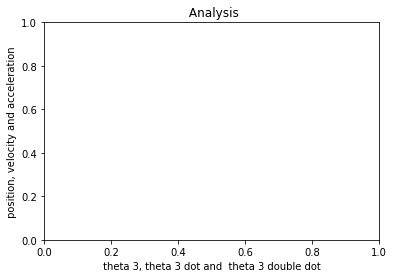

In [15]:
if (case == 1):

    plt.title(' Analysis')
    plt.xlabel(' theta 2, theta 2 dot and  theta 2 double dot ')
    plt.ylabel(' position, velocity and acceleration ')
    
    p = plt.plot([t2],[pos],'r')  
    v = plt.plot([dt2],[vel],'g')  
    ac = plt.plot([ddt2],[acc],'b')  
    
    plt.show()
    
elif (case == 2):
    
    plt.title(' Analysis')
    plt.xlabel(' theta 3, theta 3 dot and  theta 3 double dot ')
    plt.ylabel(' position, velocity and acceleration ')    
    
    p = plt.scatter(t3,pos,'r')  
    v = plt.scatter(dt3,vel,'g')  
    ac = plt.scatter(ddt3,acc,'b')  
    
    plt.show()
elif (case == 3):
    
    plt.title(' Analysis')
    plt.xlabel(' r 1, r 1 dot and  r 1 double dot ')
    plt.ylabel(' position, velocity and acceleration ')       
    
    p = plt.plot([r1],[pos],'r')  
    v = plt.plot([dr1],[vel],'g')  
    ac = plt.plot([ddr1],[acc],'b')  
        
    plt.show()